In [1]:
# Computer Vision Image Analysis

In [2]:
import requests
from io import BytesIO
from PIL import Image

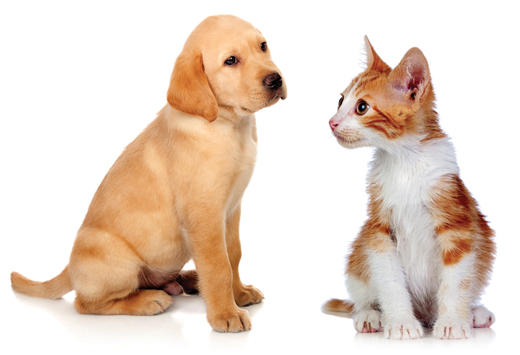

In [3]:
image_url = "https://menu.mt.co.kr/moneyweek/thumb/2017/05/17/06/2017051709058028746_1.jpg"
image = Image.open(BytesIO(requests.get(image_url).content))
# response = requests.get(img_url)
# img = BytesIO(response.content)
# image = Image.open(img)
image

In [4]:
# 필요한 값들을 준비한다
key = ''
endpoint = '' + 'vision/v3.2/'

In [5]:
ananlyze_endpoint = endpoint + 'analyze'
detect_endpoint = endpoint + 'detect'

In [6]:
headers = {'Ocp-Apim-Subscription-Key' : key}
params = {'visualFeatures' : 'Categories,Description,Color'}
data = {'url' : image_url}

In [7]:
response = requests.post(ananlyze_endpoint, headers=headers, params=params, json=data)

In [8]:
result = response.json()
result

{'categories': [],
 'color': {'dominantColorForeground': 'White',
  'dominantColorBackground': 'White',
  'dominantColors': ['White'],
  'accentColor': 'A94B22',
  'isBwImg': False,
  'isBWImg': False},
 'description': {'tags': ['dog',
   'indoor',
   'animal',
   'brown',
   'mammal',
   'orange',
   'tan'],
  'captions': [{'text': 'a cat and a dog sitting',
    'confidence': 0.49454808235168457}]},
 'requestId': 'bdf91c27-ffe6-44d1-b4f2-1257d0153c06',
 'metadata': {'height': 355, 'width': 520, 'format': 'Jpeg'},
 'modelVersion': '2021-05-01'}

In [9]:
result['description']['captions'][0]['text']

'a cat and a dog sitting'

In [10]:
# Object Detection
headers = {'Ocp-Apim-Subscription-Key' : key}
params = {}
data = {'url' : image_url}

In [11]:
response = requests.post(detect_endpoint, headers=headers, params=params, json=data)

In [12]:
result = response.json()
result

{'objects': [{'rectangle': {'x': 10, 'y': 20, 'w': 280, 'h': 309},
   'object': 'golden retriever',
   'confidence': 0.517,
   'parent': {'object': 'retriever',
    'confidence': 0.905,
    'parent': {'object': 'dog',
     'confidence': 0.921,
     'parent': {'object': 'mammal',
      'confidence': 0.932,
      'parent': {'object': 'animal', 'confidence': 0.932}}}}},
  {'rectangle': {'x': 324, 'y': 30, 'w': 174, 'h': 318},
   'object': 'cat',
   'confidence': 0.716,
   'parent': {'object': 'mammal',
    'confidence': 0.889,
    'parent': {'object': 'animal', 'confidence': 0.89}}}],
 'requestId': '11474089-e78e-4ea4-a069-3ff84f3d563a',
 'metadata': {'height': 355, 'width': 520, 'format': 'Jpeg'},
 'modelVersion': '2021-04-01'}

In [13]:
from PIL import Image, ImageDraw, ImageFont

draw = ImageDraw.Draw(image)

In [14]:
def MakeBox(res):
  objects = res['objects']
  for obj in objects:
    rect = obj['rectangle']
    print(rect)
    x = rect['x']
    y = rect['y']
    w = rect['w']
    h = rect['h']
    draw.rectangle(((x,y),(x+w,y+h)), outline='red')

    objectName = obj['object']
    draw.text((x,y), objectName, fill='blue')


In [15]:
MakeBox(result)

{'x': 10, 'y': 20, 'w': 280, 'h': 309}
{'x': 324, 'y': 30, 'w': 174, 'h': 318}


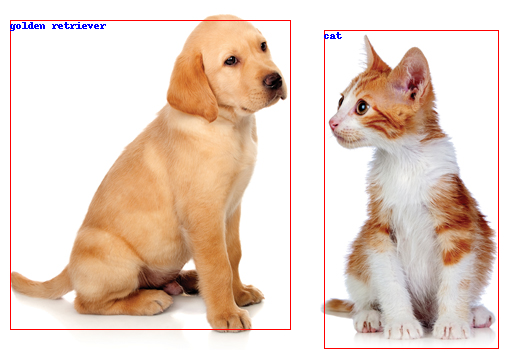

In [16]:
image

In [17]:
ocr_endpoint = endpoint + 'ocr'

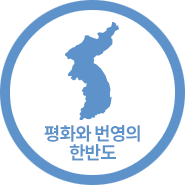

In [18]:
image_url = "https://www.unikorea.go.kr/unikorea/common/images/content/peace.png"
image = Image.open(BytesIO(requests.get(image_url).content))
image

In [19]:
headers = {'Ocp-Apim-Subscription-Key': key}
params =  {'language':'ko','detectOrientation':'true'} # 'language' : 'unk'를 쓰면 auto detect가 된다, 인식방향 자동 true 
data = {'url': image_url}

In [20]:
response = requests.post(ocr_endpoint, headers=headers, params=params, json=data)
result = response.json()
result

{'language': 'ko',
 'textAngle': 0.0,
 'orientation': 'Up',
 'regions': [{'boundingBox': '45,125,95,36',
   'lines': [{'boundingBox': '45,125,95,17',
     'words': [{'boundingBox': '45,125,46,17', 'text': '평화와'},
      {'boundingBox': '95,125,45,17', 'text': '번영의'}]},
    {'boundingBox': '70,144,46,17',
     'words': [{'boundingBox': '70,144,46,17', 'text': '한반도'}]}]}],
 'modelVersion': '2021-04-01'}

In [21]:
for reg in result['regions']:
  for line in reg['lines']:
    for word in line['words']:
      print(word['text'])s

평화와
번영의
한반도
